In [10]:
#Rainfall Prediction is one of the difficult and uncertain tasks that have a significant impact on human society. 
#Timely and accurate forecasting can proactively help reduce human and financial loss. 
#This study presents a set of experiments that involve the use of common machine learning techniques to create models that can 
#predict whether it will rain tomorrow or not based on the weather data for that day in major cities in Australia.

#I’ve always liked knowing the parameters meteorologists take into account before making a weather forecast, so I found the dataset interesting. 
#From an expert’s point of view, however, this dataset is fairly straightforward. 
#At the end of this article, you will learn:

#How is balancing done for an unbalanced dataset
#How Label Coding Is Done for Categorical Variables
#How sophisticated imputation like MICE is used
#How outliers can be detected and excluded from the data
#How the filter method and wrapper methods are used for feature selection
#How to compare speed and performance for different popular models
#Which metric can be the best to judge the performance on an unbalanced data set: precision and F1 score.

In [11]:
#Let’s start this task of rainfall prediction by importing the data

import pandas as pd
f_data=pd.read_csv("D:\devops videos\weatherAUS.csv")
f_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


# Data Exploration

In [12]:
#We will first check the number of rows and columns. 
#Next, we’ll check the size of the dataset to decide if it needs size compression.

In [13]:
f_data.shape

(142193, 24)

In [14]:
f_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [15]:
#“RainToday” and “RainTomorrow” are objects (Yes / No). 
#I will convert them to binary (1/0) for our convenience.

f_data['RainToday'].replace({'No':0, 'Yes':1},inplace=True)
f_data['RainTomorrow'].replace({'No':0, 'Yes':1},inplace=True)

In [16]:
#Next, we will check if the dataset is unbalanced or balanced. 
#If the data set is unbalanced, we need to either downsample the majority or oversample the minority to balance it.

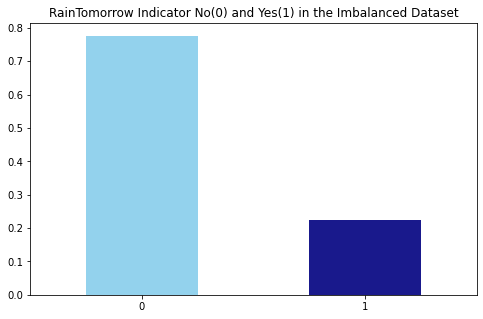

In [17]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,5))
f_data.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

In [18]:
#We can observe that the presence of “0” and “1” is almost in the 78:22 ratio. 
#So there is a class imbalance and we have to deal with it. 
#To fight against the class imbalance, we will use here the oversampling of the minority class. 
#Since the size of the dataset is quite small, majority class subsampling wouldn’t make much sense here.

# Handling Class Imbalance For Rainfall Prediction

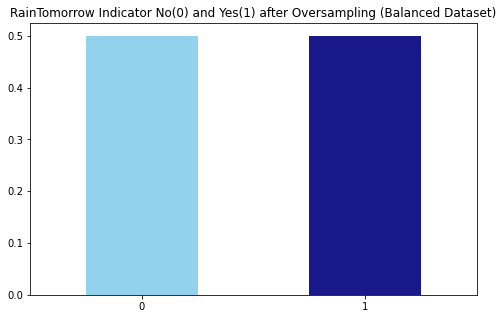

In [19]:
from sklearn.utils import resample
no=f_data[f_data.RainTomorrow == 0]
yes=f_data[f_data.RainTomorrow == 1]
yes_oversampled=resample(yes,replace=True,n_samples=len(no),random_state=123)
oversampled = pd.concat([no, yes_oversampled])


fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

In [20]:
#Now, I will check the missing data model in the dataset:

<AxesSubplot:>

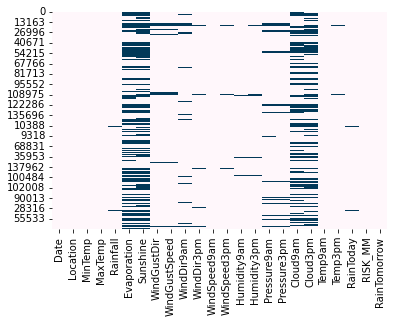

In [21]:
import seaborn as sns
sns.heatmap(oversampled.isnull(), cbar=False, cmap='PuBu')

In [22]:
#Obviously, “Evaporation”, “Sunshine”, “Cloud9am”, “Cloud3pm” are the features with a high missing percentage. 
#So we will check the details of the missing data for these 4 features.

In [23]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
Sunshine,104831,0.475140
Evaporation,95411,0.432444
Cloud3pm,85614,0.388040
Cloud9am,81339,0.368664


In [24]:
#We observe that the 4 features have less than 50 per cent missing data. 
#So instead of rejecting them completely, we’ll consider them in our model with proper imputation.

# Imputation and Transformation

In [25]:
#We will impute the categorical columns with mode, and then we will use the label encoder to convert them to numeric numbers. 
#Once all the columns in the full data frame are converted to numeric columns, 
#we will impute the missing values using the Multiple Imputation by Chained Equations (MICE) package.

#Then we will detect outliers using the interquartile range and remove them to get the final working dataset. 
#Finally, we will check the correlation between the different variables, 
#and if we find a pair of highly correlated variables, we will discard one while keeping the other.

In [26]:
oversampled.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [27]:
# Impute categorical var with Mode
oversampled['Date'] = oversampled['Date'].fillna(oversampled['Date'].mode()[0])
oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

In [28]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [29]:
import warnings
warnings.filterwarnings("ignore")
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

In [30]:
MiceImputed.iloc[:, :]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,396.0,2.0,13.4,22.9,0.6,5.735438,7.364116,13.0,44.0,13.0,...,22.0,1007.7,1007.1,8.000000,4.868720,16.9,21.8,0.0,0.0,0.0
1,397.0,2.0,7.4,25.1,0.0,5.639582,11.470601,14.0,44.0,6.0,...,25.0,1010.6,1007.8,1.734671,2.639541,17.2,24.3,0.0,0.0,0.0
2,398.0,2.0,12.9,25.7,0.0,7.762987,12.281872,15.0,46.0,13.0,...,30.0,1007.6,1008.7,1.820254,2.000000,21.0,23.2,0.0,0.0,0.0
3,399.0,2.0,9.2,28.0,0.0,5.977338,11.743982,4.0,24.0,9.0,...,16.0,1017.6,1012.8,1.236006,2.133027,18.1,26.5,0.0,1.0,0.0
4,400.0,2.0,17.5,32.3,1.0,6.852950,5.756442,13.0,41.0,1.0,...,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0,0.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130416,950.0,17.0,1.1,11.8,0.4,-1.695532,0.725087,14.0,13.0,3.0,...,98.0,1020.1,1013.3,6.438835,7.620772,4.0,9.5,0.0,8.8,1.0
114384,3114.0,29.0,9.6,14.8,11.8,3.440786,4.300000,13.0,69.0,14.0,...,71.0,1015.4,1015.7,8.000000,8.000000,11.4,12.6,1.0,5.4,1.0
84962,503.0,8.0,24.8,31.5,0.0,5.400000,3.400000,9.0,48.0,10.0,...,60.0,1008.6,1006.2,5.000000,6.000000,28.7,30.3,0.0,9.8,1.0
54992,1721.0,5.0,4.2,7.9,11.4,0.275994,0.716987,12.0,63.0,6.0,...,93.0,997.2,998.9,8.000000,8.000000,4.6,6.8,1.0,18.4,1.0


In [31]:
#Thus, the dataframe has no “NaN” value. 
#We will now detect and eliminate outliers from the inter-quartile interval-based data set.

In [32]:
# Detecting outliers with IQR
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1535.000000
Location           25.000000
MinTemp             9.300000
MaxTemp            10.200000
Rainfall            2.400000
Evaporation         4.119679
Sunshine            5.947404
WindGustDir         9.000000
WindGustSpeed      19.000000
WindDir9am          8.000000
WindDir3pm          8.000000
WindSpeed9am       13.000000
WindSpeed3pm       11.000000
Humidity9am        26.000000
Humidity3pm        30.000000
Pressure9am         8.800000
Pressure3pm         8.800000
Cloud9am            4.000000
Cloud3pm            3.681346
Temp9am             9.300000
Temp3pm             9.800000
RainToday           1.000000
RISK_MM             5.200000
RainTomorrow        1.000000
dtype: float64


In [33]:
# Removing outliers from the dataset
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(156852, 24)

In [34]:
#As a result, the dataset is now free of 1862 outliers. 
#We are now going to check multicollinearity, that is to say if a character is strongly correlated with another.

<AxesSubplot:>

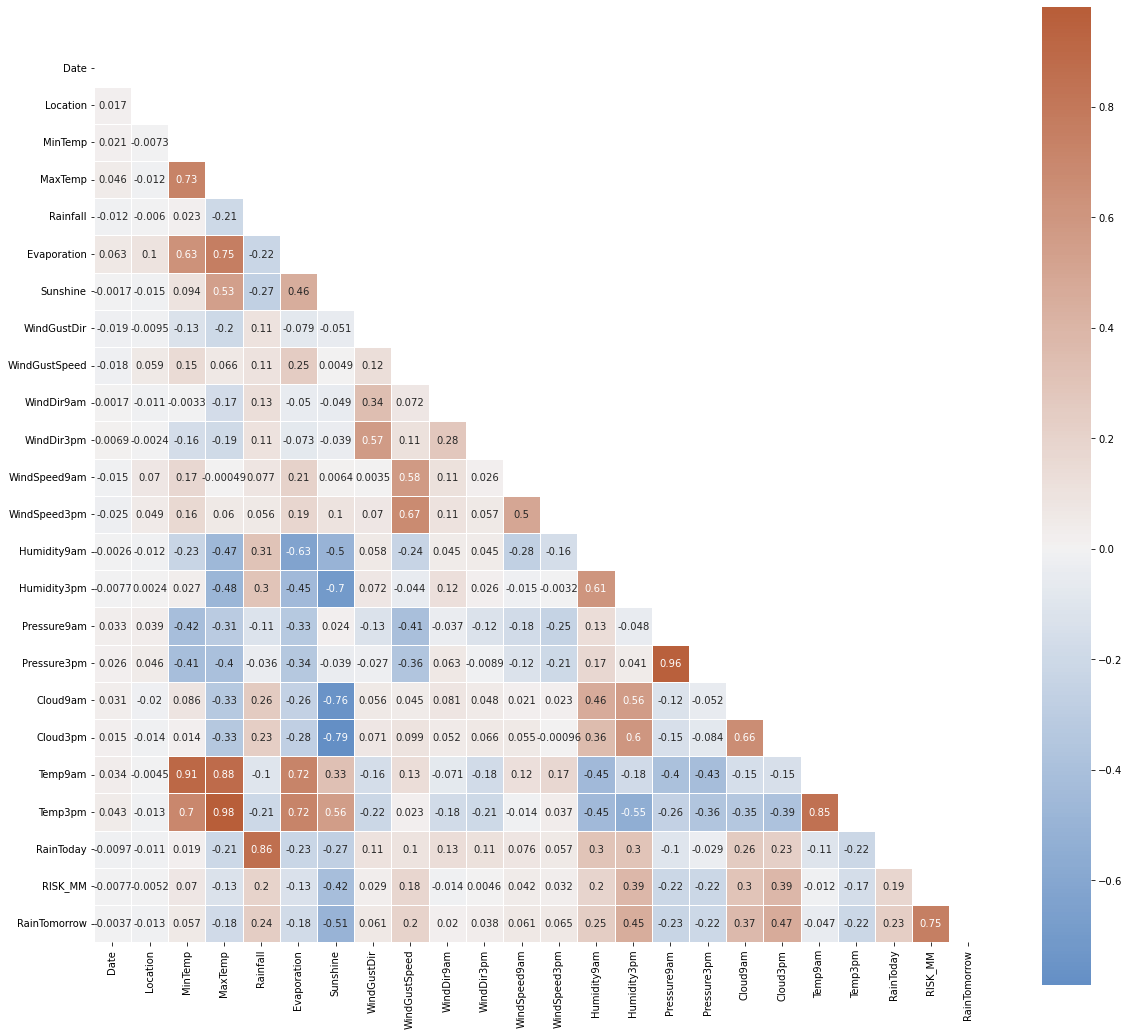

In [35]:
# Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

In [40]:
#The following feature pairs have a strong correlation with each other:

#MaxTemp and MinTemp
#Pressure9h and pressure3h
#Temp9am and Temp3pm
#Evaporation and MaxTemp
#MaxTemp and Temp3pm But in no case is the correlation value equal to a perfect “1”. 
#We are therefore not removing any functionality
#However, we can delve deeper into the pairwise correlation between these highly correlated characteristics by examining the following pair diagram.
#Each of the paired plots shows very clearly distinct clusters of RainTomorrow’s “yes” and “no” clusters. 
#There is very minimal overlap between them.

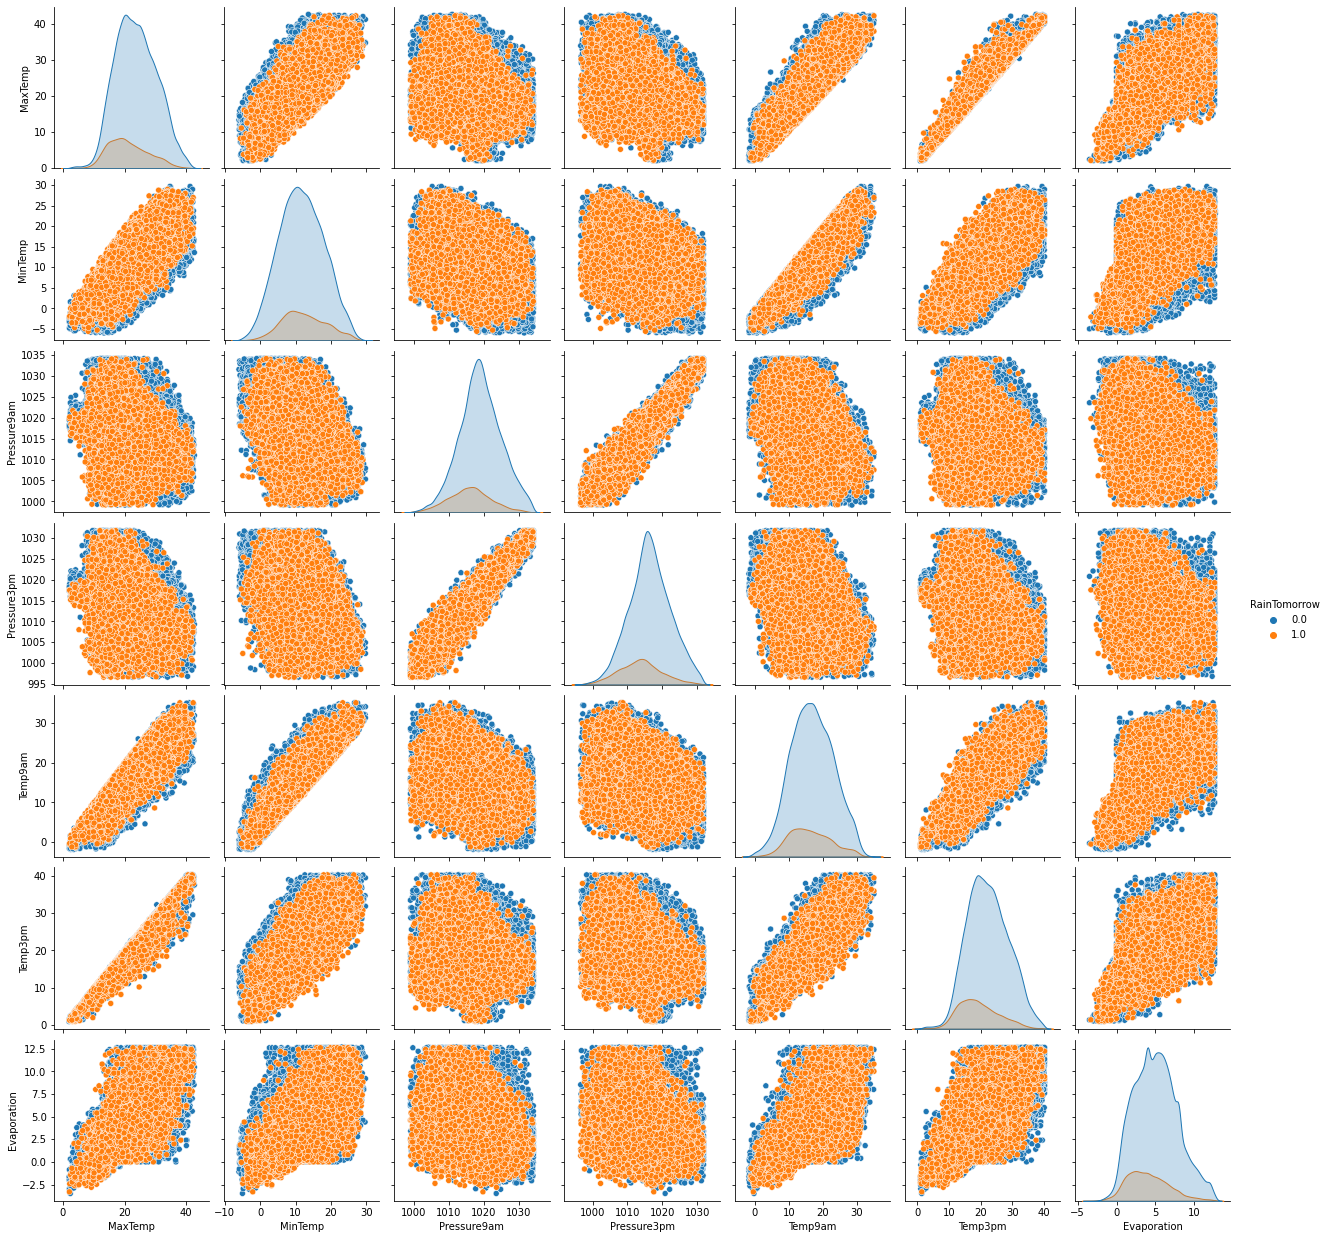

In [43]:
MiceImputed = MiceImputed.drop_duplicates()
MiceImputed = MiceImputed.reset_index(drop=True)
sns.pairplot(data=MiceImputed, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm','Temp9am','Temp3pm','Evaporation'),hue='RainTomorrow')

# Feature Selection for Rainfall Prediction

In [44]:
#I will use both the filter method and the wrapper method for feature selection to train our rainfall prediction model.

#Selecting features by filtering method (chi-square value): before doing this, we must first normalize our data. \
#We use MinMaxScaler instead of StandardScaler in order to avoid negative values.

In [45]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)

In [46]:
# Feature Importance using Filter Method (Chi-Square)
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday',
       'RISK_MM'],
      dtype='object')


In [47]:
#We can observe that “Sunshine”, “Humidity9am”, “Humidity3pm”, “Pressure9am”, “Pressure3pm” 
#have higher importance compared to other features.

#Selection of features by wrapping method (random forest):

In [48]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Sunshine', 'RISK_MM']
[0.00253406 0.00261586 0.00314578 0.00390372 0.00760189 0.00294695
 0.04406978 0.00159447 0.00710055 0.00196506 0.00187788 0.00174155
 0.00209666 0.00535281 0.03094741 0.00805485 0.01067992 0.01338267
 0.03057928 0.00314218 0.00503934 0.0026982  0.80692913]


# Training Rainfall Prediction Model with Different Models

In [49]:
#We will divide the dataset into training (75%) and test (25%) sets respectively to train the rainfall prediction model. 
#For best results, we will standardize our X_train and X_test data:

In [50]:
features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = MiceImputed['RainTomorrow']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [51]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [52]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken

Accuracy = 0.8788308740068105
ROC Area under Curve = 0.6701390535864719
Cohen's Kappa = 0.41861857180236195
Time taken = 2.424312114715576
              precision    recall  f1-score   support

         0.0    0.89653   0.96912   0.93142     23935
         1.0    0.68133   0.37115   0.48054      4257

    accuracy                        0.87883     28192
   macro avg    0.78893   0.67014   0.70598     28192
weighted avg    0.86404   0.87883   0.86333     28192



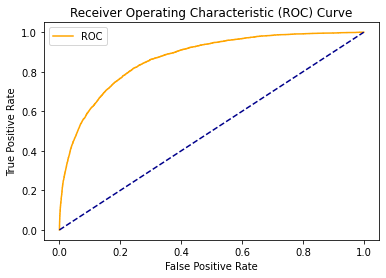

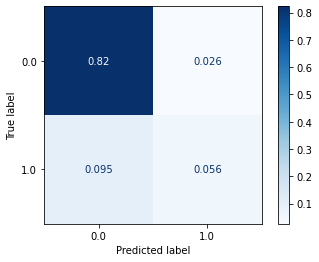

In [53]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.8590734960272418
ROC Area under Curve = 0.6974185429677776
Cohen's Kappa = 0.4180488844520126
Time taken = 0.47826266288757324
              precision    recall  f1-score   support

         0.0    0.90722   0.92902   0.91799     23935
         1.0    0.53857   0.46582   0.49956      4257

    accuracy                        0.85907     28192
   macro avg    0.72289   0.69742   0.70877     28192
weighted avg    0.85155   0.85907   0.85481     28192



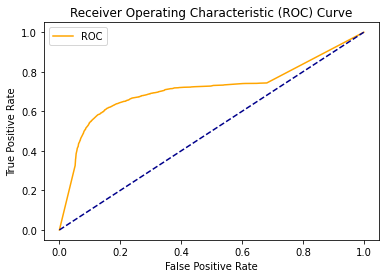

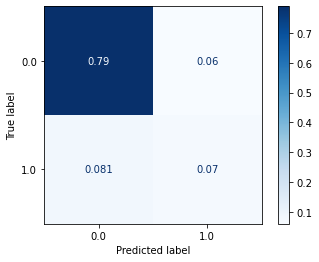

In [54]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Accuracy = 0.8976660045402951
ROC Area under Curve = 0.7076900484972736
Cohen's Kappa = 0.5099809886847875
Time taken = 21.821776390075684
              precision    recall  f1-score   support

         0.0    0.90706   0.97986   0.94206     23935
         1.0    0.79366   0.43552   0.56241      4257

    accuracy                        0.89767     28192
   macro avg    0.85036   0.70769   0.75224     28192
weighted avg    0.88994   0.89767   0.88473     28192



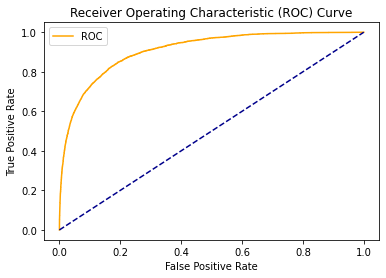

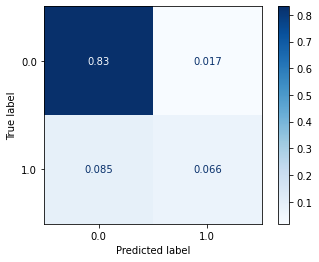

In [55]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

Accuracy = 0.9137698637911464
ROC Area under Curve = 0.7757882309769446
Cohen's Kappa = 0.6212219327946071
Time taken = 39.7219672203064
              precision    recall  f1-score   support

         0.0    0.92843   0.97347   0.95042     23935
         1.0    0.79490   0.57811   0.66939      4257

    accuracy                        0.91377     28192
   macro avg    0.86167   0.77579   0.80990     28192
weighted avg    0.90827   0.91377   0.90798     28192



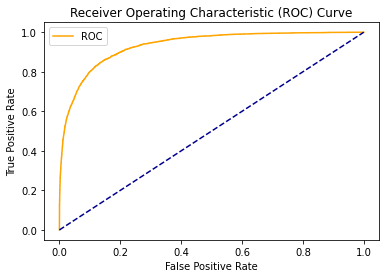

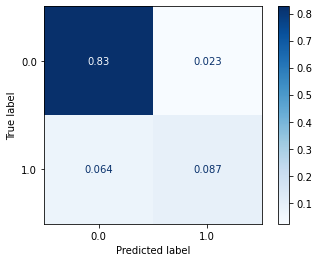

In [56]:
# XGBoost
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

# Rainfall Prediction Model Comparison

In [57]:
#Now we need to decide which model performed best based on Precision Score, ROC_AUC, Cohen’s Kappa and Total Run Time. 
#One point to mention here is: we could have considered F1-Score as a better metric for judging model performance instead of accuracy, 
#but we have already converted the unbalanced dataset to a balanced one, so consider accuracy as a metric for deciding the best model 
#is justified in this case.

#For a better decision, we chose “Cohen’s Kappa” which is actually an ideal choice as a metric to 
#decide on the best model in case of unbalanced datasets. Let’s check which model worked well on which front:

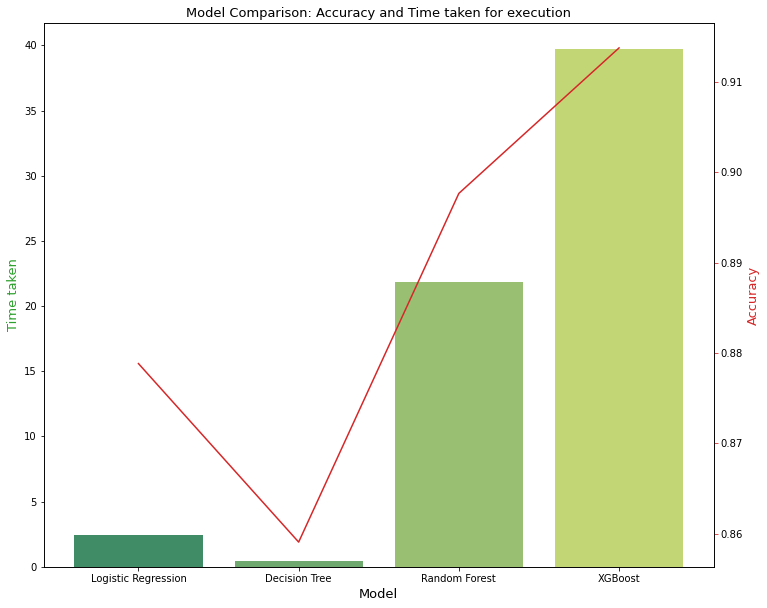

In [60]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_xgb]
roc_auc_scores = [roc_auc_lr, roc_auc_dt,roc_auc_rf,roc_auc_xgb]
coh_kap_scores = [coh_kap_lr, coh_kap_dt,coh_kap_rf,coh_kap_xgb]
tt = [tt_lr, tt_dt,tt_rf,tt_xgb]

model_data = {'Model': ['Logistic Regression','Decision Tree','Random Forest','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

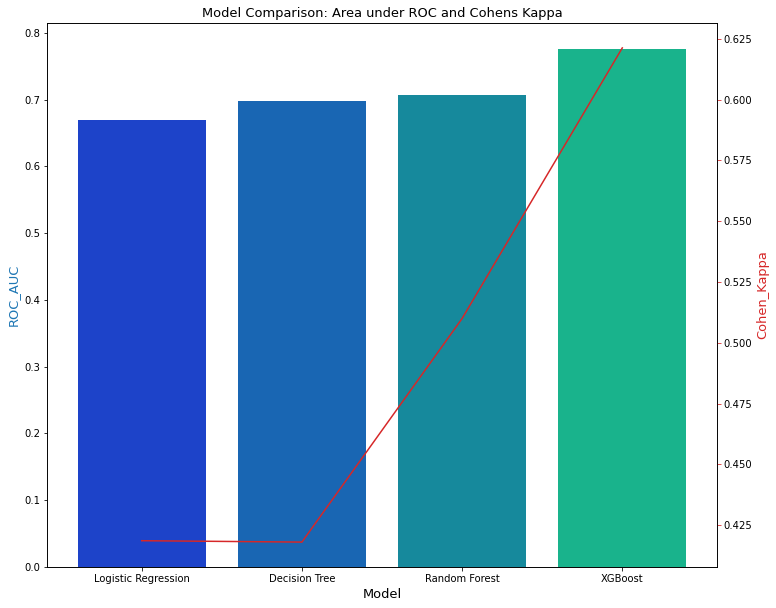

In [61]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()

In [ ]:
#We can observe that XGBoost,Random Forest performed better compared to other models. 
#However, if speed is an important thing to consider, we can stick with Random Forest instead of XGBoost.